In [1]:
%matplotlib widget
import matplotlib as mpl
import matplotlib.pyplot as plt
import athplot
import numpy as np

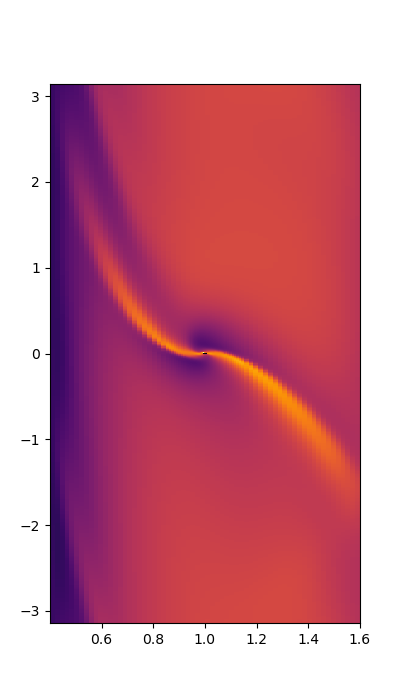

In [10]:
ds = athplot.Raw_Data_Restricted("work/ppd_cyl.out1.00023.athdf")
fig, ax = plt.subplots(figsize=(4, 7))
for lev in range(4):
    cccs, lds = ds.get_level(lev) # meaning: cell center coordinates, level data set
    meshr, meshphi = np.meshgrid(cccs[0], cccs[1])
    im = ax.pcolormesh(meshr, meshphi, lds['dens'], shading='nearest', cmap="inferno", vmin=0., vmax=1)

In [ ]:
fig